## Installing 

In [1]:
#go to project folder and install:
#!pip3 install -e .

## Preparing data for analysis 

In [2]:
from carnext.dataset import get_datasets

carnext - 21:46:20 - Reading and processing datasets
carnext - 21:46:21 - Number of initial features: 79


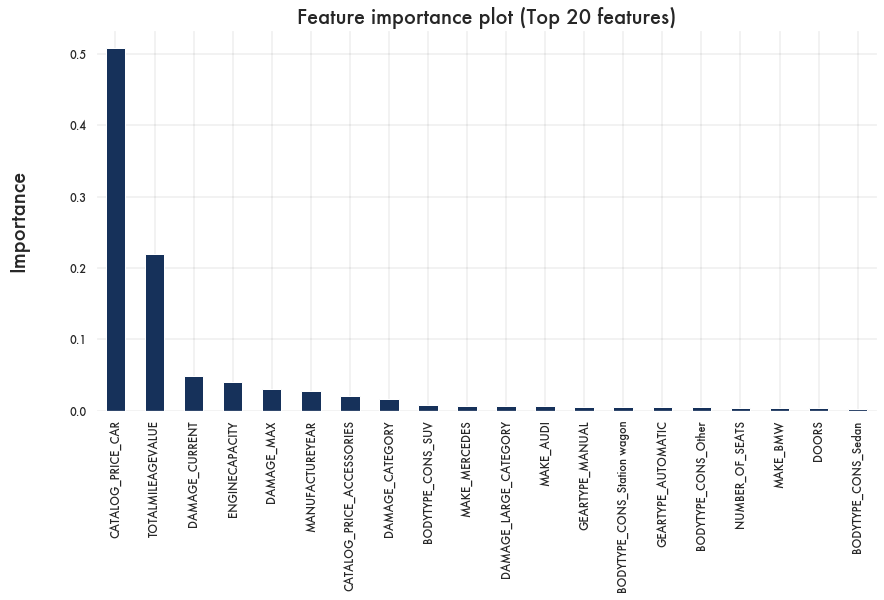

carnext - 21:46:30 - Number of features selected: 8
carnext - 21:46:30 - Selected feautres: ['CATALOG_PRICE_CAR', 'TOTALMILEAGEVALUE', 'DAMAGE_CURRENT', 'ENGINECAPACITY', 'DAMAGE_MAX', 'MANUFACTUREYEAR', 'CATALOG_PRICE_ACCESSORIES', 'DAMAGE_CATEGORY']


In [3]:
df_train, df_target, df_merged = get_datasets()

## Predicting vehicles sell price 

In [4]:
from carnext.catboost_model import PredictSellPrice

In [5]:
model = PredictSellPrice()

In [6]:
model.tune_fit(df_train)

carnext - 21:46:30 - Starting hyperparameter tunning


0:	loss: 3633.2962155	best: 3633.2962155 (0)	total: 1.6s	remaining: 46.5s
1:	loss: 3545.5088557	best: 3545.5088557 (1)	total: 3.74s	remaining: 52.4s
2:	loss: 3674.3991977	best: 3545.5088557 (1)	total: 5.66s	remaining: 51s
3:	loss: 3691.1167418	best: 3545.5088557 (1)	total: 7.79s	remaining: 50.6s
4:	loss: 3702.9741127	best: 3545.5088557 (1)	total: 9.59s	remaining: 47.9s
5:	loss: 3694.6937702	best: 3545.5088557 (1)	total: 11.2s	remaining: 44.9s
6:	loss: 3747.5678213	best: 3545.5088557 (1)	total: 13.1s	remaining: 42.9s
7:	loss: 3747.8599438	best: 3545.5088557 (1)	total: 15.8s	remaining: 43.4s
8:	loss: 3769.2438097	best: 3545.5088557 (1)	total: 18.1s	remaining: 42.3s
9:	loss: 3733.1756734	best: 3545.5088557 (1)	total: 20.9s	remaining: 41.9s
10:	loss: 3707.4058684	best: 3545.5088557 (1)	total: 25s	remaining: 43.2s
11:	loss: 3671.4255241	best: 3545.5088557 (1)	total: 28.7s	remaining: 43s
12:	loss: 3778.3308245	best: 3545.5088557 (1)	total: 34s	remaining: 44.5s
13:	loss: 3720.1932738	best: 35

carnext - 21:54:17 - Best parameters: {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
carnext - 21:54:17 - Fitting model on training dataset


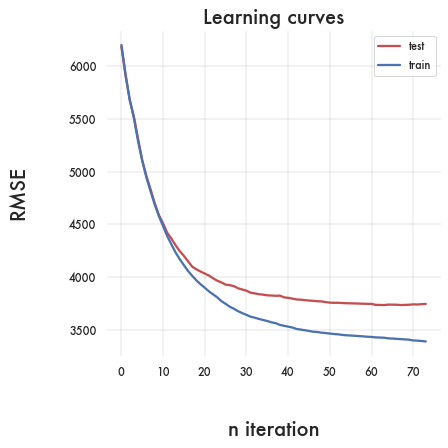

In [7]:
model.plot_model_fit()

In [8]:
df_predicted = model.predict(df_target)

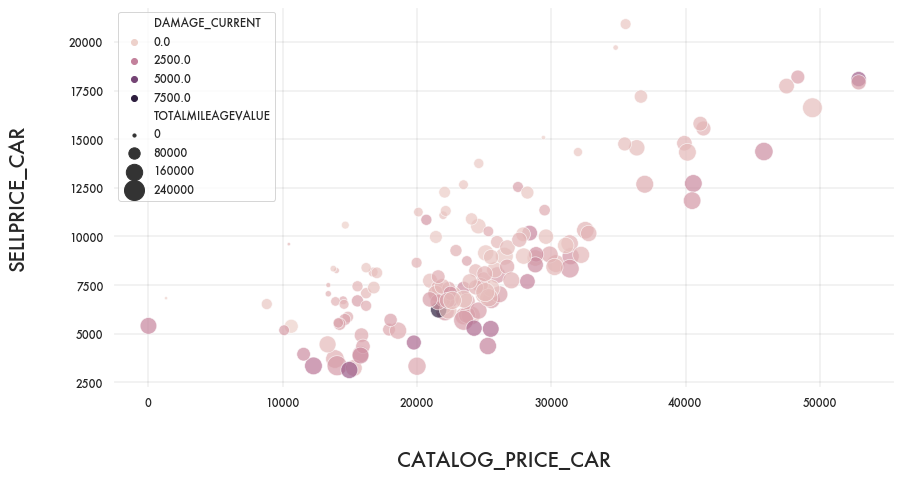

In [9]:
model.plot_predictions()

## Selection of vehicles 

In [15]:
from carnext.selection import select_cars, add_sell_price

In [16]:
selected_vehicles = select_cars(df_merged, N=50)

carnext - 21:55:16 - Selecting optimal 50 cars to sell BSC


In [17]:
selected_vehicles = add_sell_price(selected_vehicles, df_predicted)

In [18]:
selected_vehicles.to_csv("selected_vehicles.csv")